  # ML Model For DHT11 Sensor Data

#### Featurs : 'Date', 'Timestamp', 'Temperature', 'Humidity', 'Comfort Level'
#### Model Used : RandomForestClassifier

In [52]:
#Require Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
#import Dataset
data = pd.read_csv("shuffled_dataset.csv")

###  1) EDA (Exploratory Data Analysis)

In [33]:
#Display the first 5 record
data.head()

,Date,Timestamp,Temperature,Humidity,Comfort Level
0,3/15/19,22:08:36,28.262846,32.062490,High
1,02/24/24,16:51:04,24.267460,50.727880,Moderate
2,3/15/19,18:58:07,12.109280,97.056816,Low
3,3/14/19,22:08:38,31.407044,47.941159,High
4,3/15/19,11:31:47,20.351748,61.401055,High


In [34]:
#Display the last 5 record
data.tail()

,Date,Timestamp,Temperature,Humidity,Comfort Level
14330,02/24/24,07:22:11,19.340508,34.822146,Moderate
14331,3/15/19,03:54:52,26.077732,34.582584,Moderate
14332,3/15/19,12:11:57,25.423503,95.174236,Low
14333,02/24/24,03:54:37,23.644718,40.786201,Moderate
14334,3/14/19,23:38:29,31.122495,126.693423,Low


In [64]:
data.columns

Index(['Date', 'Timestamp', 'Temperature', 'Humidity', 'Comfort Level'], dtype='object')

In [35]:
#display the totle number of record,mean,std,min etc.
data.describe()

,Temperature,Humidity
count,14319.000000,14319.000000
mean,22.862800,66.102804
std,6.913627,34.681543
min,9.226015,11.836173
25%,18.320768,38.538274
50%,22.702641,55.958505
75%,27.175416,94.267204
max,37.028092,139.828206


In [36]:
#shape of dataset
data.shape

(14335, 5)

In [37]:
#lets see the dtypes of each feature
data.dtypes

Date              object
Timestamp         object
Temperature      float64
Humidity         float64
Comfort Level     object
dtype: object

In [38]:
#check the whethe feature had null values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14335 entries, 0 to 14334
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           14335 non-null  object 
 1   Timestamp      14335 non-null  object 
 2   Temperature    14319 non-null  float64
 3   Humidity       14319 non-null  float64
 4   Comfort Level  14335 non-null  object 
dtypes: float64(2), object(3)
memory usage: 560.1+ KB


### 1.1) Data Cleaning

In [39]:
#now see the totale count of null values
data.isnull().sum()

Date              0
Timestamp         0
Temperature      16
Humidity         16
Comfort Level     0
dtype: int64

In [41]:
# Drop rows with missing values or 
#drop the null values
df = data.dropna()

In [42]:
#now see the totale count of null values
df.isnull().sum()
#all null values removed

Date             0
Timestamp        0
Temperature      0
Humidity         0
Comfort Level    0
dtype: int64

### 1.2) Data Vusialization and Analysis 

<Axes: >

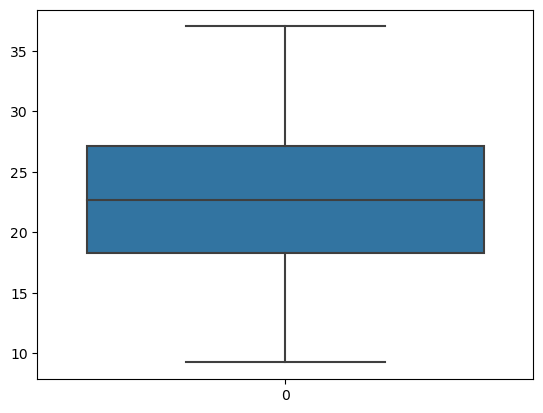

In [44]:
#Now lets check whether data has any outlier
#boxplot for temp
sns.boxplot(df['Temperature'])
#Their is no outlier in temp column/feature

<Axes: >

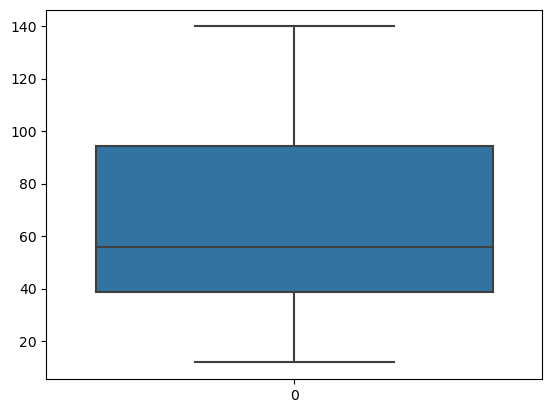

In [45]:
#boxplot for temp
sns.boxplot(df['Humidity'])
#Their is no outlier in Humidity column/feature

<Axes: xlabel='Temperature', ylabel='Density'>

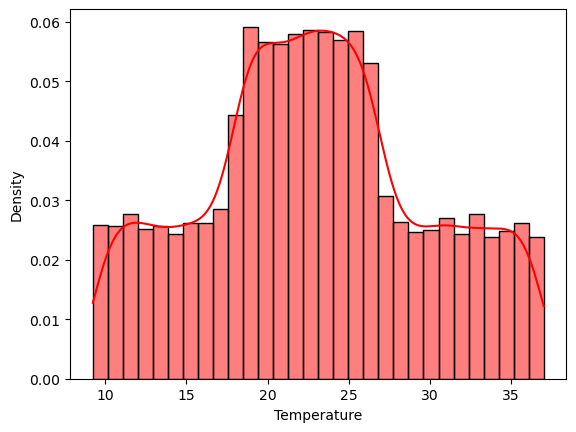

In [49]:
#now check whether data is normaly distributed or not
sns.histplot(df['Temperature'], kde=True, color='red', bins=30, stat='density')
#on the basis of the visualisation we conclude that that is normaly distributed 
#beacuse maximum data is near to the mean and also it not any outlier.

<Axes: xlabel='Humidity', ylabel='Density'>

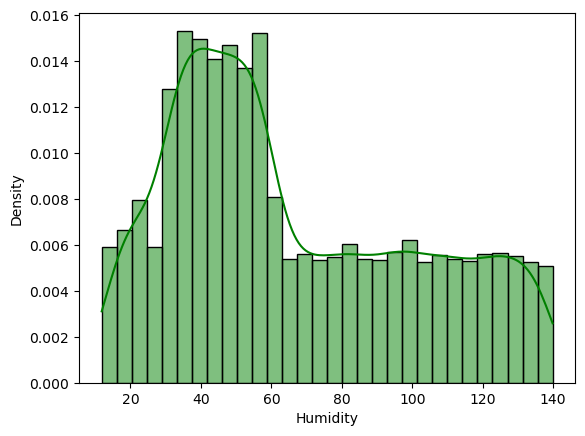

In [50]:
#now check whether data is normaly distributed or not
sns.histplot(df['Humidity'], kde=True, color='green', bins=30, stat='density')
#on the basis of the visualisation we conclude that that is normaly distributed 
#beacuse maximum data is near to the mean and also it not any outlier.

D:\anacondaa4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


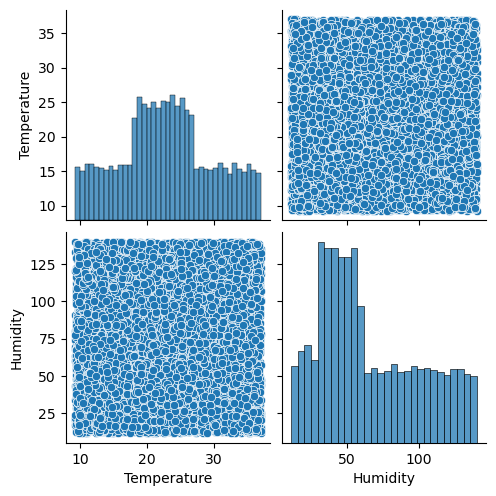

In [55]:
# Visualize the distribution of numerical features
sns.pairplot(df)
plt.show()

In [58]:
dff=df[['Temperature', 'Humidity']]

###  2) One hot Encoding/

In [5]:
#their is onlt high,low,moderate parameter in comfort level feature and this three are repeat everytime
#for that we used LabelEncoder()
label_encoder = LabelEncoder()
df['Comfort Level'] = label_encoder.fit_transform(df['Comfort Level'])

In [63]:
df['Comfort Level'].head(30)

0         High
1     Moderate
2          Low
3         High
4         High
5     Moderate
6          Low
7     Moderate
8     Moderate
9          Low
10    Moderate
11         Low
12         Low
13    Moderate
14         Low
15    Moderate
16         Low
17         Low
18         Low
19        High
20         Low
21        High
22        High
23    Moderate
24    Moderate
25        High
26        High
27        High
28    Moderate
29         Low
Name: Comfort Level, dtype: object

### 3) Model Building

In [6]:
# Define features and target variable
X = df[['Temperature', 'Humidity']]
y = df['Comfort Level']

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions on the testing set
predictions = model.predict(X_test)

### 4) Model Accuracy

In [10]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

In [11]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#We get and 99% Accuracy of model

Accuracy: 0.9996508379888268
Precision: 0.9996513318530577
Recall: 0.9996508379888268
F1 Score: 0.9996508898457516


### 5} Model Testing

In [23]:
# Example prediction for new data
# 0=high
# 1=low
# 2=moderate
new_data = [[36.5, 75]]  # Example temperature and humidity values
predicted_value = model.predict(new_data)

if predicted_value==0:
    pred= "high"
elif predicted_value==1:
    pred= "Low"
elif predicted_value==2:
    pred= "moderate"
    
print("Predicted Comfort Level:", pred)

Predicted Comfort Level: Low


D:\anacondaa4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
